# Heart Disease Prediction

## Importing Useful Modules

In [42]:
import warnings 
warnings.filterwarnings('ignore')

import pickle as pkl
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, f1_score

import xgboost as xgb

from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
cmap = sns.cm.mako_r

%matplotlib inline

## Importing Data

In [43]:
data = pd.read_csv('./data/heart.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [70]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Preprocessing

In [44]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


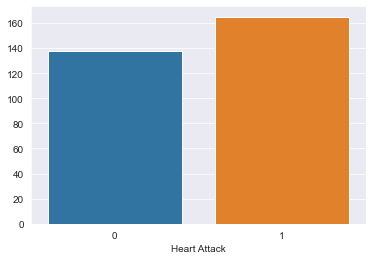

In [45]:
xaxis = data['target'].value_counts().index
yaxis = data['target'].value_counts().values

graph = sns.barplot(xaxis, yaxis)
graph.set_xlabel('Heart Attack')
plt.show()

In [49]:
X = data.drop(columns=['target'])
y = data['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [50]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train = pd.DataFrame(scaled_X_train, columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])

scaled_X_test = pd.DataFrame(scaled_X_test, columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])

print(scaled_X_train)
print(scaled_X_test)


          age  sex        cp    trtbps      chol  fbs  restecg  thalachh  \
0    0.208333  0.0  0.666667  0.000000  0.157044  0.0      0.5  0.798246   
1    0.000000  1.0  0.333333  0.367347  0.168591  0.0      0.0  1.000000   
2    0.437500  0.0  0.666667  0.265306  0.203233  0.0      0.5  0.614035   
3    0.520833  1.0  0.000000  0.469388  0.249423  0.0      0.5  0.631579   
4    0.187500  1.0  0.666667  0.448980  0.101617  0.0      0.5  0.745614   
..        ...  ...       ...       ...       ...  ...      ...       ...   
207  0.437500  1.0  0.666667  0.469388  0.235566  0.0      0.5  0.657895   
208  0.458333  1.0  0.666667  0.000000  0.221709  0.0      0.5  0.578947   
209  0.833333  1.0  1.000000  0.673469  0.237875  1.0      0.0  0.377193   
210  0.354167  1.0  0.000000  0.265306  0.272517  0.0      0.0  0.491228   
211  0.708333  0.0  0.333333  0.469388  0.147806  0.0      0.5  0.798246   

     exng   oldpeak  slp   caa     thall  
0     0.0  0.000000  1.0  0.00  0.666667  
1

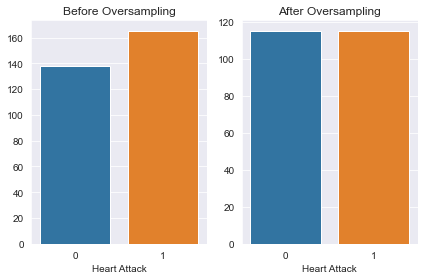

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Heart Attack')

sm = SMOTE(random_state = 2) 
scaled_X, y = sm.fit_resample(scaled_X_train, y_train) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Heart Attack')

plt.tight_layout()
plt.show()

## Training the Models

### linear SVM

In [56]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(scaled_X_train, y_train)
print(clf_svm.score(scaled_X_test, y_test))

0.8131868131868132


In [55]:
clf_svm = svm.SVC()
clf_svm.fit(scaled_X_train, y_train)
print(clf_svm.score(scaled_X_test, y_test))

0.8131868131868132


### KNeighbours Classifier

In [58]:
clf_knb = KNeighborsClassifier()
clf_knb.fit(scaled_X_train, y_train)
print(clf_knb.score(scaled_X_test, y_test))

0.8021978021978022


### RandomForest Classifier

In [59]:
clf_rfc = RandomForestClassifier(n_estimators=247)
clf_rfc.fit(scaled_X_train, y_train)
print(clf_rfc.score(scaled_X_test, y_test))

0.8131868131868132


### XGBoost

In [60]:
clf_xgb = xgb.XGBRegressor(objective="binary:logistic", colsample_bytree = 0.3, learning_rate = 0.09, n_estimators=100, max_depth = 5)

clf_xgb.fit(scaled_X_train, y_train)

print(clf_xgb.score(scaled_X_test, y_test))

[18:05:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.481388080791577


### GridSearch

In [64]:
parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf_svm1 = GridSearchCV(svc, parameters, cv=5)
clf_svm1.fit(scaled_X_train, y_train)

print(clf_svm1.score(scaled_X_test, y_test))

0.8131868131868132


## Analysing Our Model

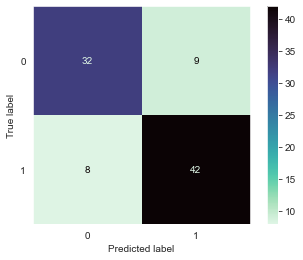

[0.83168317 0.79012346]


In [72]:
plot_confusion_matrix(clf_svm1, scaled_X_test, y_test, cmap=cmap)
plt.grid(False)
plt.show()
print(f1_score(y_test, clf_svm1.predict(scaled_X_test), average=None, labels=[1, 0]))

## Saving and Loading our Model

In [67]:
with open('./models/heart_disease_classifier.pkl', 'wb') as f:
    pkl.dump(clf_svm1, f)
with open('./models/scaler.pkl', 'wb') as f:
    pkl.dump(scaler, f)

In [68]:
with open('./models/heart_disease_classifier.pkl', 'rb') as f:
    loaded_clf = pkl.load(f)